Biodiversity Analysis-PROJECT SCOPE
Intro/Define Problem: Data will be cleaned,  analyzed, plotted to pose questions and seek meaningful answers. 
Goal: Goal is to analyze animals' conservation status in parks and investigate the patterns or themes to types of species that become endangered.
Data: Provided by Codeacademy in csv form
Constraints: Data is from the last 7 days which may not be enough data to work with; Data is also not accurate
Data Cleaning Tools: Pandas
Analysis Tools: Pandas, MatPlotlib
Analysis on different parks, on conservation status of different categories focusing mainly on endangered species
Visualization Tools: Matplotlib, Seaborn

Findings: 15 species that are endangered have been sighted in the 4 US national parks. Most of the species that are endangered fall under mammal category. Reptiles and Non vascular plants are not endangered. Highest number of gray wolf sightings in yellow stone national park. Birds have the highest amount of observations however they are endangered. Categories that are endangered fall under mammals, birds,amphibian, fish and vascular plants.  Least sighted species fall under Amphibian, and as they are endangered as well this requires immediate attention from conseervationists. Even though vascular plants has had second highest sighting and is not currently endangered, they are still a species of concern. Great smoky mountains national park has the least amount of sightings

Conclusion:
Studies should be conducted on the environment of Yellowstone Park so that animals' habitats can be studied to allow them thrive as it has the highest animal sightings. I have learnt that 6 out of the 15 endangered animals are mammals, which is unexpected. 



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from collections import Counter

In [2]:
# Open observations.csv
observations_df = pd.read_csv('observations.csv')

#glimpse into last 5 data
observations_df.tail()


,scientific_name,park_name,observations
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171
23295,Cucurbita pepo,Yosemite National Park,164


In [3]:
# Open species_info.csv
species_info_df = pd.read_csv('species_info.csv')

#glimpse into last 5 data
species_info_df.tail()
species_info_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:

species_info_df.info()
observations_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [5]:
#join species and observation file on their common column
merged_df = pd.merge(species_info_df, observations_df, on='scientific_name', how='outer')
display(merged_df)


,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128
...,...,...,...,...,...,...
25627,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN,Yellowstone National Park,237
25628,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Great Smoky Mountains National Park,50
25629,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Yellowstone National Park,239
25630,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Bryce National Park,111


In [6]:
# Dropping rows where 'conservation_status' is empty      
cleaned_df = merged_df.dropna(subset=['conservation_status'])
display(cleaned_df)

,category,scientific_name,common_names,conservation_status,park_name,observations
64,Mammal,Canis latrans,Coyote,Species of Concern,Bryce National Park,85
65,Mammal,Canis latrans,Coyote,Species of Concern,Yellowstone National Park,206
66,Mammal,Canis latrans,Coyote,Species of Concern,Great Smoky Mountains National Park,68
67,Mammal,Canis latrans,Coyote,Species of Concern,Yosemite National Park,99
68,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,35
...,...,...,...,...,...,...
24171,Vascular Plant,Botrychium ascendens,"Trianglelobe Moonwort, Upswept Moonwort",Species of Concern,Great Smoky Mountains National Park,30
25044,Vascular Plant,Romneya coulteri,Coulter's Matilija Poppy,Species of Concern,Bryce National Park,101
25045,Vascular Plant,Romneya coulteri,Coulter's Matilija Poppy,Species of Concern,Yosemite National Park,125
25046,Vascular Plant,Romneya coulteri,Coulter's Matilija Poppy,Species of Concern,Great Smoky Mountains National Park,67


In [7]:
# Displaying rows where 'conservation_status' is Endangered  
filtered_df = merged_df[merged_df['conservation_status'] == 'Endangered']
display(filtered_df)

,category,scientific_name,common_names,conservation_status,park_name,observations
68,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,35
69,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,27
70,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,29
71,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,74
72,Mammal,Canis lupus,Gray Wolf,Endangered,Great Smoky Mountains National Park,15
...,...,...,...,...,...,...
20695,Bird,Gymnogyps californianus,California Condor,Endangered,Yellowstone National Park,64
21012,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered,Yosemite National Park,42
21013,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered,Yellowstone National Park,60
21014,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered,Bryce National Park,31


In [8]:
#add observation where category is same
observation_species = cleaned_df.groupby('category')['observations'].sum()
display(observation_species)

category
Amphibian             2752
Bird                 42724
Fish                  4209
Mammal               25146
Nonvascular Plant     2705
Reptile               2536
Vascular Plant       22849
Name: observations, dtype: int64

In [9]:
#Park info
observation_in_park = cleaned_df.groupby('park_name')['observations'].sum()
display(observation_in_park)

park_name
Bryce National Park                    18609
Great Smoky Mountains National Park    12816
Yellowstone National Park              44583
Yosemite National Park                 26913
Name: observations, dtype: int64

Text(0.5, 1.0, 'Bar Plot of Sightings in Different National Parks')

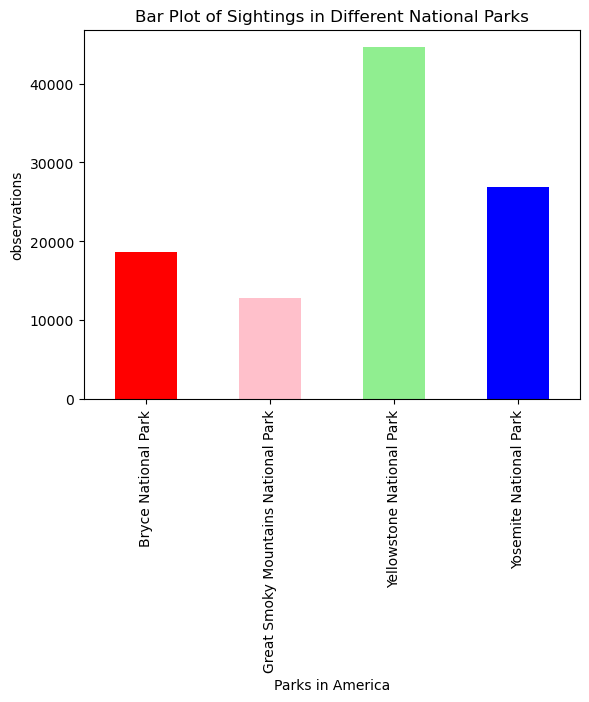

In [10]:
#observations in american parks
observation_in_park.plot(kind='bar', color=['red','pink','lightgreen','blue','skyblue','maroon','orange'])
plt.xlabel('Parks in America')
plt.ylabel('observations')
plt.title('Bar Plot of Sightings in Different National Parks')


Text(0.5, 1.0, 'sightings of different categories')

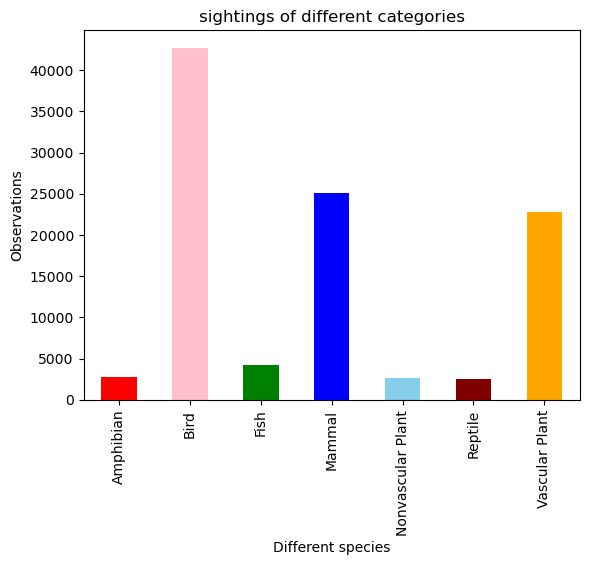

In [11]:
#box plot 
observation_species.plot(kind='bar', color=['red','pink','green','blue','skyblue','maroon','orange'])
#labels for axes
plt.xlabel('Different species')
plt.ylabel('Observations')

#title of plot
plt.title('sightings of different categories')


In [12]:
#add observation where common name is same
observ = cleaned_df.groupby('common_names')['observations'].count()
display(observ)

common_names
American Badger, Badger                              8
American Bittern                                     4
American Fever-Few, Wild Quinine                     4
American Peregrine Falcon                            4
American Swallow-Tailed Kite, Swallow-Tailed Kite    4
                                                    ..
Yellow-Breasted Chat                                 4
Yellowfin Madtom                                     4
Yosemite Toad                                        4
Yosemite Woolly Sunflower                            4
Yuma Myotis, Yuma Myotis                             4
Name: observations, Length: 190, dtype: int64

In [13]:
conservation_counts = cleaned_df.groupby('conservation_status')['category'].sum()
display(conservation_counts)
conservation_counts[0]

conservation_status
Endangered            MammalMammalMammalMammalMammalMammalMammalMamm...
In Recovery           MammalMammalMammalMammalMammalMammalMammalMamm...
Species of Concern    MammalMammalMammalMammalMammalMammalMammalMamm...
Threatened            MammalMammalMammalMammalFishFishFishFishFishFi...
Name: category, dtype: object

'MammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalMammalBirdBirdBirdBirdBirdBirdBirdBirdBirdBirdBirdBirdFishFishFishFishFishFishFishFishVascular PlantVascular PlantVascular PlantVascular PlantFishFishFishFishMammalMammalMammalMammalBirdBirdBirdBirdAmphibianAmphibianAmphibianAmphibian'

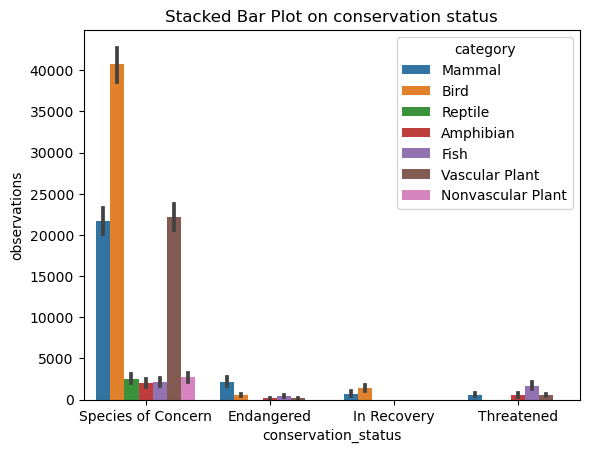

In [14]:
# Create the stacked bar plot of conservation status
sns.barplot(data=cleaned_df, x="conservation_status", y="observations", hue="category", estimator=sum)
plt.title("Stacked Bar Plot on conservation status")
plt.show()


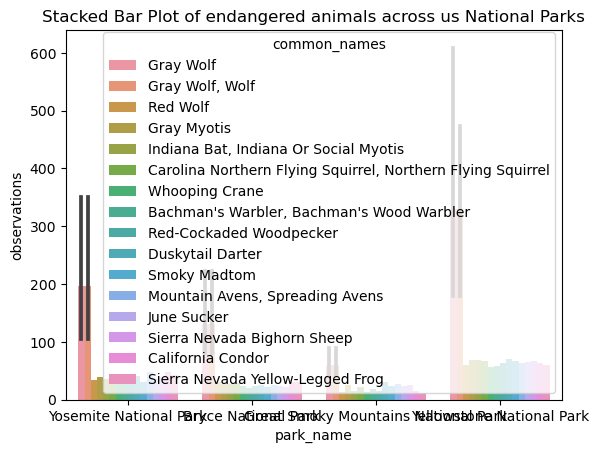

In [22]:
# Create the stacked bar plot on endangered animals
sns.barplot(data=filtered_df, x="park_name", y="observations", hue="common_names", estimator=sum)
plt.title("Stacked Bar Plot of endangered animals across us National Parks")
plt.show()


In [16]:
#analysis on endangered animals
species = filtered_df.groupby('common_names')['observations'].sum()
display(species)

common_names
Bachman's Warbler, Bachman's Wood Warbler                      141
California Condor                                              156
Carolina Northern Flying Squirrel, Northern Flying Squirrel    153
Duskytail Darter                                               166
Gray Myotis                                                    160
Gray Wolf                                                      715
Gray Wolf, Wolf                                                715
Indiana Bat, Indiana Or Social Myotis                          145
June Sucker                                                    146
Mountain Avens, Spreading Avens                                162
Red Wolf                                                       137
Red-Cockaded Woodpecker                                        146
Sierra Nevada Bighorn Sheep                                    153
Sierra Nevada Yellow-Legged Frog                               144
Smoky Madtom                                     

Text(0.5, 1.0, 'Sightings of endangered species in Different National Parks')

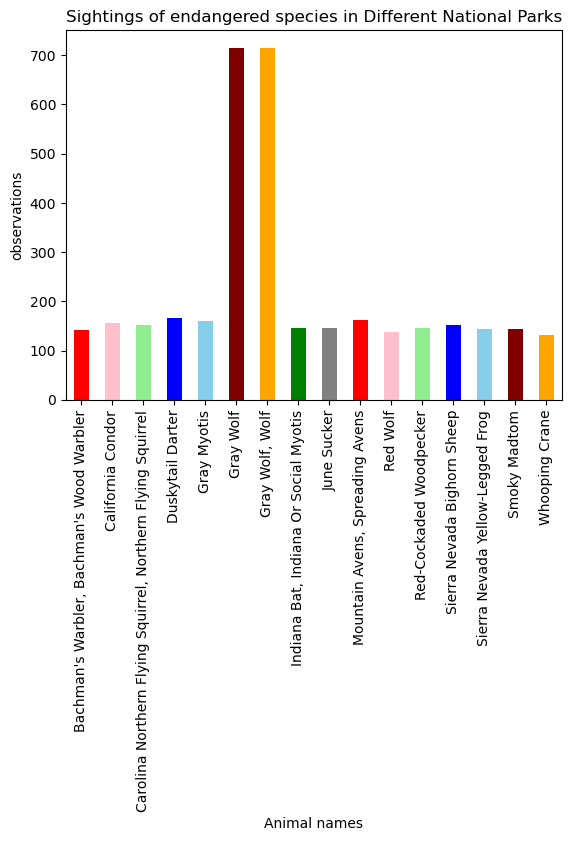

In [21]:
species.plot(kind='bar', color=['red','pink','lightgreen','blue','skyblue','maroon','orange', 'green', 'grey'])
plt.xlabel('Animal names')
plt.ylabel('observations')
plt.title('Sightings of endangered species in Different National Parks')

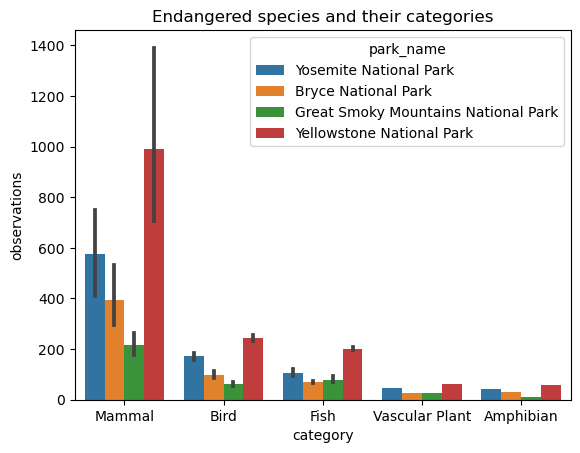

In [23]:

sns.barplot(data=filtered_df, x="category", y="observations", hue="park_name", estimator=sum)
plt.title("Endangered species and their categories across different parks")
plt.show()